In [934]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import scipy.io


In [935]:
def PageRank(G, alpha):
    R = G.shape[0]  # Number of rows (pages)
    e = np.ones(R)

    
    # Initialize d vector for dangling nodes
    d = np.zeros(R)
    d[np.sum(G, axis=0) == 0] = 1
    
    # Initialize P matrix with transition probabilities
    P = np.zeros((R, R))
    
    degree = np.sum(G, axis=0)
    non_zero_degree = degree != 0
    P[:, non_zero_degree] = G[:, non_zero_degree] / degree[non_zero_degree]
    
    Q = P + (1/R) * e*d  # Form Q matrix
    
    M = alpha*Q + (1-alpha)*(1/R)*e*e
        
    # Initialize pagerank vector with equal probability for each page
    p = np.ones(R) / R
    
    # Initialize iteration counter and error measure
    it = 0
    conver = 1
    
    # PageRank iteration
    while conver > 1e-8:
        new_p = M @ p  # Matrix multiplication
        conver = np.linalg.norm(new_p - p, 1)  
        p = new_p
        it += 1
    
    return p, it

## Part B

PageRank Scores: [0.0382414  0.03975201 0.07811446 0.0755481  0.04881933 0.03752567
 0.06466336 0.092549   0.10044188 0.05724224 0.020353   0.2054911
 0.10964775 0.0316107 ]
Iterations: 25


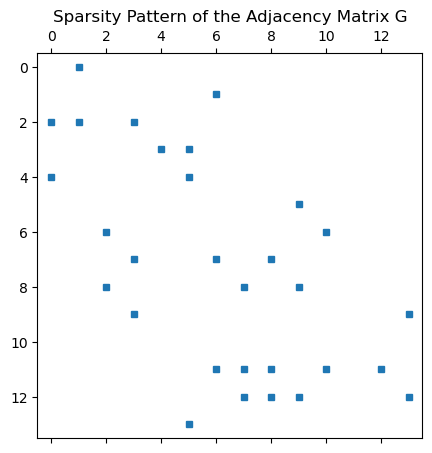

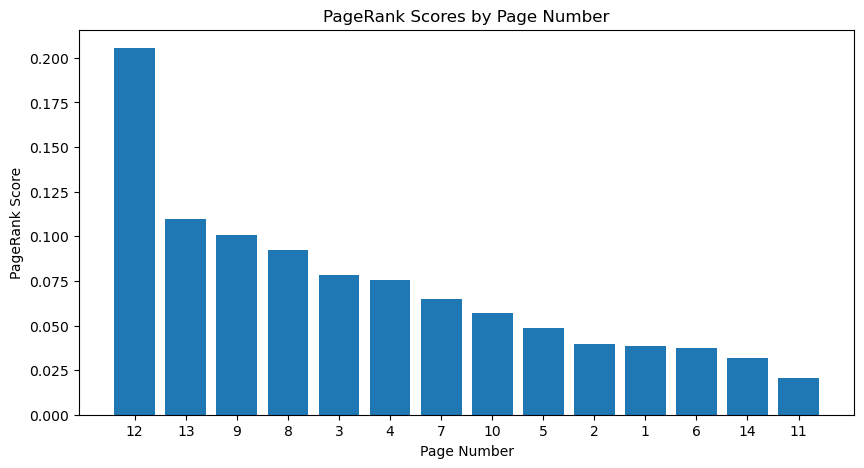

Pages in descending order of importance: [12 13  9  8  3  4  7 10  5  2  1  6 14 11]


In [936]:
G = np.array([
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Page 1
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # Page 2
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Page 3
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # Page 4
    [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # Page 5
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # Page 6
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # Page 7
    [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],  # Page 8
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],  # Page 9
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # Page 10
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Page 11
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0],  # Page 12
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1],  # Page 13
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]   # Page 14
])

alpha = 0.9
p, it = PageRank(G, alpha)

print("PageRank Scores:", p)
print("Iterations:", it)

plt.figure(figsize=(10, 5))
plt.spy(G, precision=0.01, markersize=5)
plt.title('Sparsity Pattern of the Adjacency Matrix G')
plt.show()

sorted_indices = np.argsort(p)[::-1]  
sorted_scores = p[sorted_indices]     

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(p) + 1), sorted_scores, tick_label=sorted_indices + 1)
plt.xlabel('Page Number')
plt.ylabel('PageRank Score')
plt.title('PageRank Scores by Page Number')
plt.show()

print("Pages in descending order of importance:", sorted_indices + 1)


## Part C

In [937]:
def PageRankSparse(Gcsr, alpha):
    R = Gcsr.shape[0]
    e = np.ones(R)
    p = e / R
    
    # Calculate the dangling nodes' contribution
    d = np.zeros(R)
    d[Gcsr.sum(axis=0).A1 == 0] = 1

    # Create a sparse P matrix
    P = np.zeros((R, R))
    degree = Gcsr.sum(axis=0).A1
    non_zero_degree = degree != 0
    P[:, non_zero_degree] = Gcsr[:, non_zero_degree] / degree[non_zero_degree]


    tol=1e-8
    converted = False
    while not converted:
        p_old = p.copy()
        p = alpha * P.dot(p) + (1 - alpha) * e / R + alpha*d.dot(p)/R        
        if np.linalg.norm(p - p_old) < tol:
            print("Converged after", it, "iterations.")
            converted = True
    return p, it


## Part D

In [938]:

# Load the data
data = scipy.io.loadmat('bbc.mat')
Gcsr = data['G']
Gcsr = Gcsr.transpose()  # data uses the reverse adjacency matrix convention.
U = data['U']

# Apply the PageRank algorithm
alpha = 0.9
p, it = PageRankSparse(Gcsr, alpha)

# Print the top 20 URLs
top_20_indices = np.argsort(p)[-20:][::-1]
for i in top_20_indices:
    print(U[i])

Converged after 25 iterations.
[array(['http://www.bbc.com'], dtype='<U18')]
[array(['https://www.bbc.com/news'], dtype='<U24')]
[array(['https://www.bbc.co.uk/news'], dtype='<U26')]
[array(['http://www.bbcamerica.com'], dtype='<U25')]
[array(['http://www.bbc.com/future/story/20181024-the-best-age-to-learn-a-foreign-language'],
       dtype='<U81')                                                                         ]
[array(['http://www.bbc.com/future/story/20181026-how-one-sided-objects-like-a-mobius-strip-work'],
       dtype='<U87')                                                                               ]
[array(['https://www.bbcgoodfood.com'], dtype='<U27')]
[array(['https://www.bbc.com/news/business-45939984'], dtype='<U42')]
[array(['https://www.bbc.com/news/education-45979234'], dtype='<U43')]
[array(['https://www.bbc.com/news/uk-politics-45948282'], dtype='<U45')]
[array(['https://www.bbc.com/news/business-45961761'], dtype='<U42')]
[array(['http://www.bbc.com/travel/